<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em>

# Gradienten

Gradienten zu verstehen wird es uns zu einem späteren Zeitpunkt erlauben, Kantenerkennung zu verstehen, welche wir später verwenden werden, da es ein ein wichtiger Aspekt der Objekterkennung im Allgemeinen ist.
Bitte schau dir das Video der Lektion an für einen vollständigen Überblick!

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../DATA/sudoku.jpg',0)

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

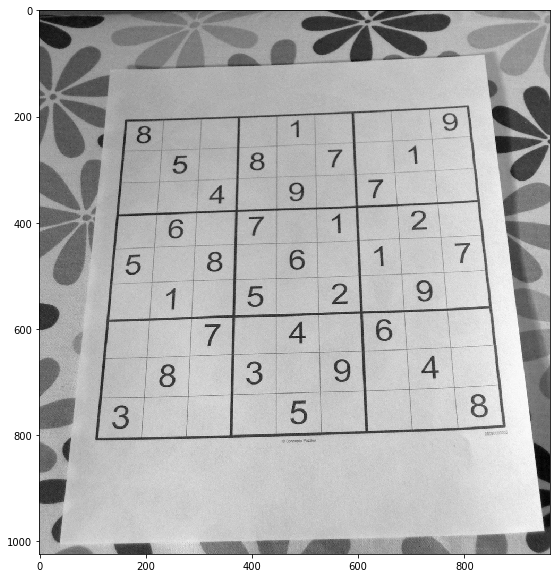

In [4]:
display_img(img)

In [5]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

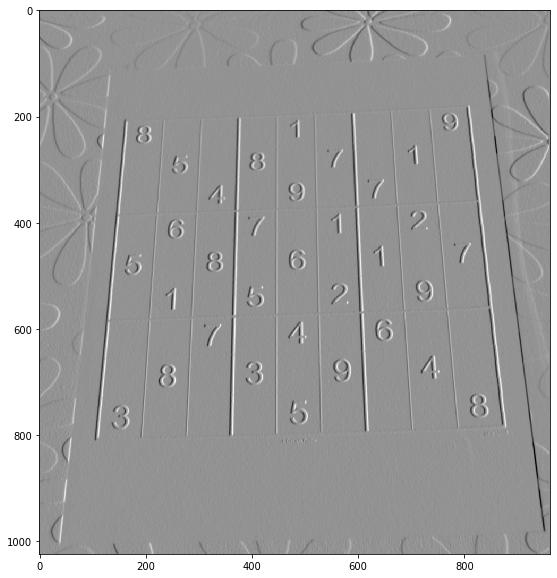

In [6]:
display_img(sobelx)

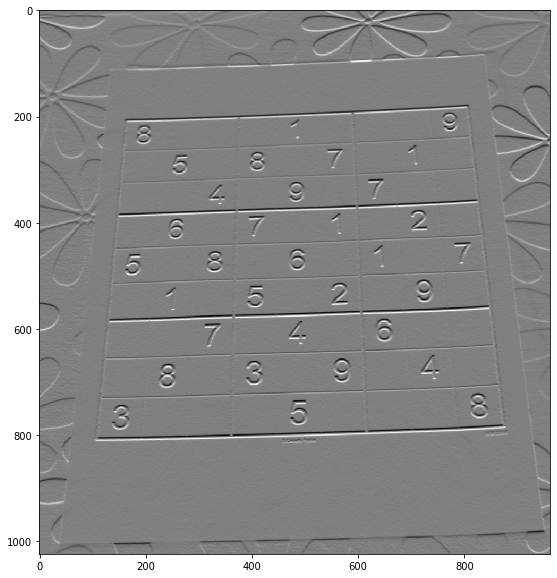

In [7]:
display_img(sobely)

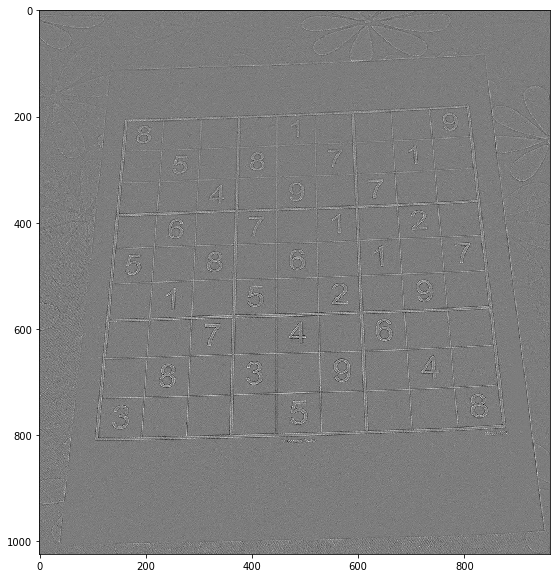

In [8]:
display_img(laplacian)

## Mit voherigen Ideen kombinieren

Lasst uns mit diesen Bildern und einigen der anderen Ideen, die wir bereits behandelt haben, herumspielen!

### Bilder verschmelzen (blending)

In [9]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

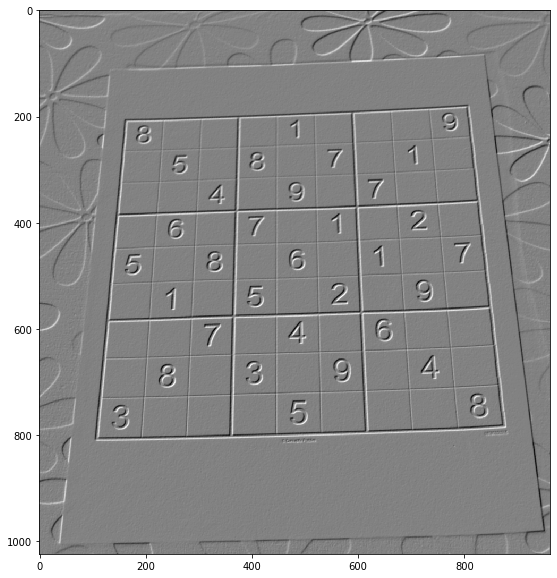

In [10]:
display_img(blended)

In [11]:
blended.shape

(1024, 962)

### Morphologische Operatoren

In [12]:
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

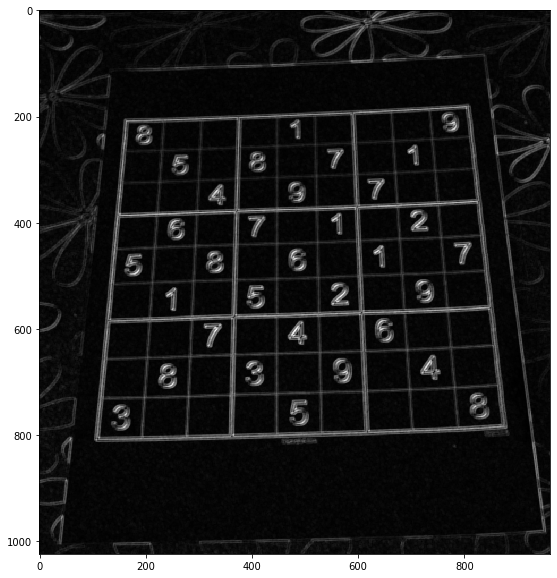

In [13]:
display_img(gradient)

Versuche es mit dem laplace'schen Ergebnis!

In [14]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

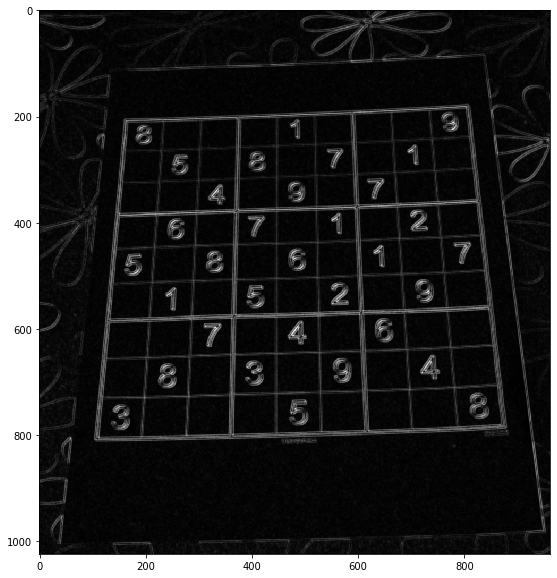

In [15]:
display_img(gradient)

### Schwellenwerte

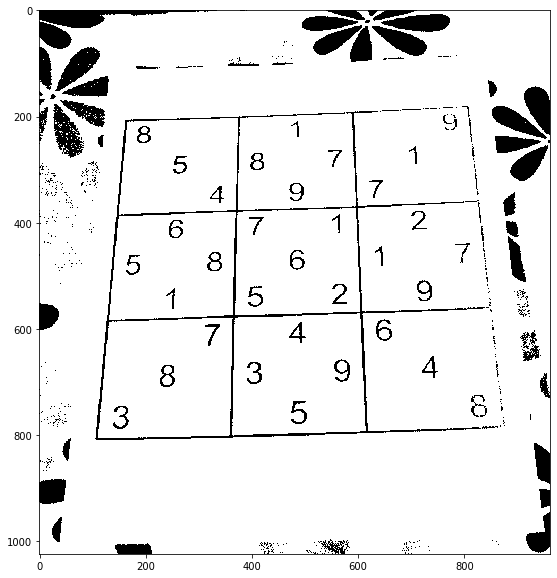

In [16]:
ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
display_img(th1)

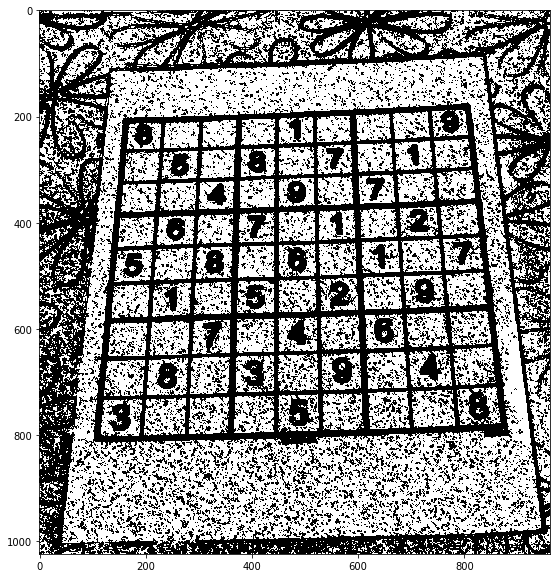

In [17]:
ret,th1 = cv2.threshold(gradient,200,255,cv2.THRESH_BINARY_INV)
display_img(th1)

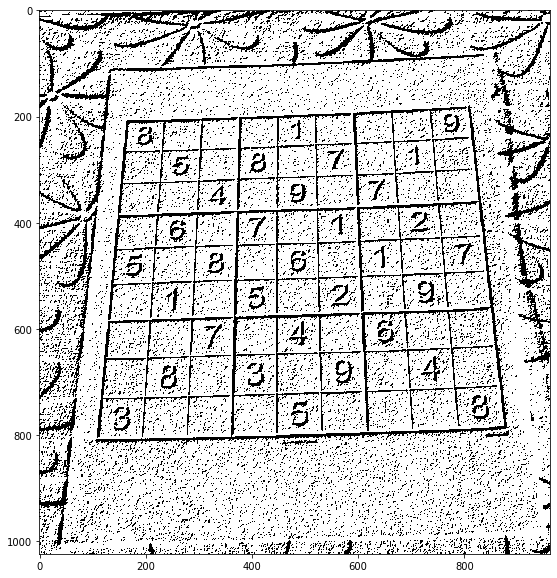

In [18]:
ret,th1 = cv2.threshold(blended,100,255,cv2.THRESH_BINARY_INV)
display_img(th1)

##### Gut gemacht! Behalte dieses Sudoku im Hinterkopf. Im weiteren Verlauf wirst du über Fertigkeiten des Maschinellen Sehens (computer vision) verfügen, um ein Programm zu erzeugen, das nur auf einem Bild basierende Sudoku Puzzles lösen kann.